In [36]:
from rdkit.Chem import RDConfig
import rdkit as rd
import os
import sys
from openbabel import openbabel as ob
from openbabel import pybel as pb
sys.path.append(os.path.join(RDConfig.RDContribDir, "SA_Score"))
import sascorer
import re
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
f_file = open("frags.smi")
frags = f_file.read().split("\n")
frags = [re.sub(r'\s+', '', frag) for frag in frags if '.' not in frag]

In [34]:
sa_result = dict()
error = []
for frag in frags:
    try:
        #mol_pb = next(pb.readfile('pdbqt', os.path.join(lig_dir, name)))
        #mol = rd.Chem.MolFromMolBlock(mol_pb.write('sdf'))
        mol = rd.Chem.MolFromSmiles(frag)
        mol = AllChem.AddHs(mol)
        sa_result[frag] = sascorer.calculateScore(mol)
    except Exception as e:
        print(e)
        break
        error.append(frag)


<Axes: ylabel='Density'>

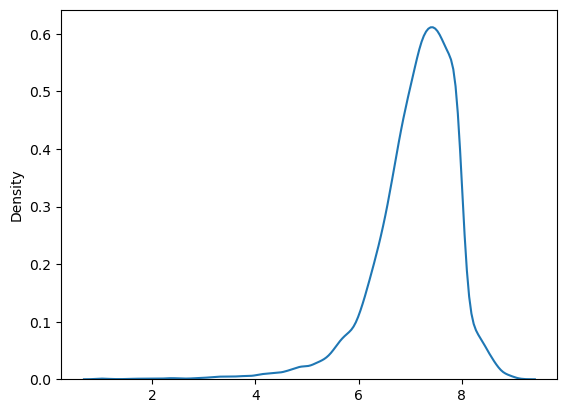

In [39]:
sns.kdeplot(list(sa_result.values()))

In [37]:
error

[]

In [15]:
mol_pb = next(pb.readfile('pdbqt', os.path.join(lig_dir, "75.pdbqt")))
mol = rd.Chem.MolFromMolBlock(mol_pb.write('sdf'))
mol

[11:33:17] Explicit valence for atom # 12 N, 4, is greater than permitted


In [5]:
import time
t = time.time()
for i in range(100):
    sascorer.calculateScore(mol)

print(time.time()-t)

0.42066287994384766
